In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


df = pd.read_csv("Amstelveen.csv")
df['lbmVUDistance'] = df['lbm'] + (np.log(df['distance']) * -0.01901745)
df['lbmVUTravelTime'] = df['lbm'] + df['VUTravel']
df['lbmRental'] = df['lbm'] + (df['number_of_rental'] * 0.12600989)
df['lbmRoomsStudios'] = df['lbm'] + (df['number_rooms'] * 0.12600989)
df['lbmApartments'] = df['lbm'] + (df['number_apartments'] * 0.12600989)
df['lbmDistanceRoomsStudios'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (df['number_rooms'] * 0.12600989)
df['lbmDistanceApartments'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (df['number_apartments'] * 0.12600989)
df['lbmDistanceRental'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (df['number_of_rental'] * 0.12600989)
df['lbmDistanceTravel'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + df['VUTravel']
df['lbmTravelRental'] = df['lbm'] + df['VUTravel'] + (df['number_of_rental'] * 0.12600989)
df['lbmTravelRoomsStudios'] = df['lbm'] + df['VUTravel'] + (df['number_rooms'] * 0.12600989)
df['lbmTravelApartments'] = df['lbm'] + df['VUTravel'] + (df['number_apartments'] * 0.12600989)
df['lbmDistanceTravelRooms'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + df['VUTravel'] + (df['number_rooms'] * 0.12600989)
df['lbmDistanceTravelApartments'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + df['VUTravel'] + (df['number_apartments'] * 0.12600989)
df['lbmVUScore'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + df['VUTravel'] + (df['number_of_rental'] * 0.12600989)  
df['VUDistanceScore'] = (np.log(df['distance']) * -0.01901745)
df['RoomsStudiosScore'] = (df['number_rooms'] * 0.12600989)
df['ApartmentsScore'] = (df['number_apartments'] * 0.12600989)
df['Rental'] = (df['number_of_rental'] * 0.12600989) + (df['number_apartments'] * 0.12600989)
df['DistanceRoomsStudios'] = (np.log(df['distance']) * -0.01901745) + (df['number_rooms'] * 0.12600989)
df['DistanceApartments'] = (np.log(df['distance']) * -0.01901745) + (df['number_apartments'] * 0.12600989)
df['DistanceRental'] = (np.log(df['distance']) * -0.01901745) + (df['number_of_rental'] * 0.12600989)
df['DistanceTravel'] = (np.log(df['distance']) * -0.01901745) + df['VUTravel']
df['TravelRental'] = df['VUTravel'] + (df['number_of_rental'] * 0.12600989)
df['TravelRoomsStudios'] = df['VUTravel'] + (df['number_rooms'] * 0.12600989)
df['TravelApartments'] = df['VUTravel'] + (df['number_apartments'] * 0.12600989)
df['DistanceTravelRooms'] = (np.log(df['distance']) * -0.01901745) + df['VUTravel'] + (df['number_rooms'] * 0.12600989)
df['DistanceTravelApartments'] = (np.log(df['distance']) * -0.01901745) + df['VUTravel'] + (df['number_apartments'] * 0.12600989)
df['VUScore'] = (np.log(df['distance']) * -0.01901745) + df['VUTravel'] + (df['number_of_rental'] * 0.12600989)  


df.to_csv("UpdatedAmstelveen.csv", index=False, float_format = "{:.15f}".format)


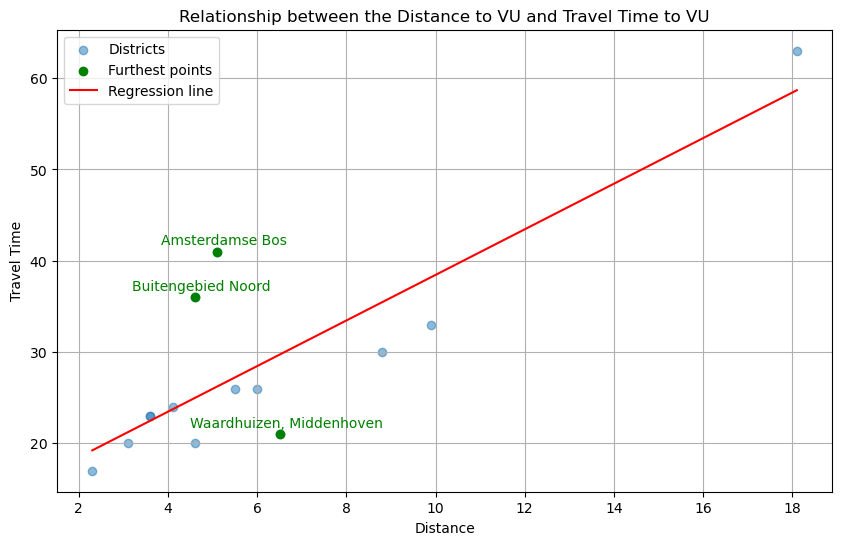

Correlation Coefficient (r_value): 0.8444166065467343


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the linear regression line for distance and travel_time
slope, intercept, r_value, p_value, std_err = linregress(df['distance'], df['travel_time'])

# Calculate the distances of each point from the regression line
x = df['distance']
y = df['travel_time']
trendline_y = intercept + slope * x
distances = np.abs(y - trendline_y)

# Find the indices of the three furthest points
furthest_indices = np.argsort(distances)[-3:]

# Get the names of the corresponding wk_naam
furthest_wk_naam = df.iloc[furthest_indices]['wk_naam']

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['distance'], df['travel_time'], alpha=0.5, label='Districts')

# Highlight the furthest points
plt.scatter(df.iloc[furthest_indices]['distance'], df.iloc[furthest_indices]['travel_time'], color='green', label='Furthest points')

# Annotate the furthest points
for i in furthest_indices:
    plt.annotate(df.iloc[i]['wk_naam'], (df.iloc[i]['distance'], df.iloc[i]['travel_time']), 
                 textcoords="offset points", xytext=(5,5), ha='center', color='green')

# Regression line
x_line = np.linspace(df['distance'].min(), df['distance'].max(), 100)
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, color='red', label='Regression line')

# Adding labels, title, legend, and grid
plt.title('Relationship between the Distance to VU and Travel Time to VU')
plt.xlabel('Distance')
plt.ylabel('Travel Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient (r_value): {r_value}")


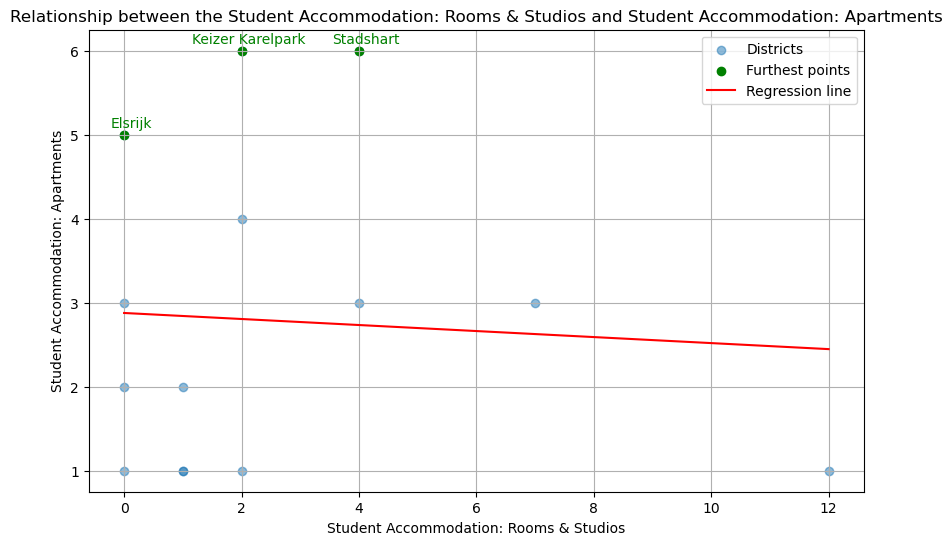

Correlation Coefficient (r_value): -0.06536286396585847


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the linear regression line for distance and travel_time
slope, intercept, r_value, p_value, std_err = linregress(df['number_rooms'], df['number_apartments'])

# Calculate the distances of each point from the regression line
x = df['number_rooms']
y = df['number_apartments']
trendline_y = intercept + slope * x
distances = np.abs(y - trendline_y)

# Find the indices of the three furthest points
furthest_indices = np.argsort(distances)[-3:]

# Get the names of the corresponding wk_naam
furthest_wk_naam = df.iloc[furthest_indices]['wk_naam']

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['number_rooms'], df['number_apartments'], alpha=0.5, label='Districts')

# Highlight the furthest points
plt.scatter(df.iloc[furthest_indices]['number_rooms'], df.iloc[furthest_indices]['number_apartments'], color='green', label='Furthest points')

# Annotate the furthest points
for i in furthest_indices:
    plt.annotate(df.iloc[i]['wk_naam'], (df.iloc[i]['number_rooms'], df.iloc[i]['number_apartments']), 
                 textcoords="offset points", xytext=(5,5), ha='center', color='green')

# Regression line
x_line = np.linspace(df['number_rooms'].min(), df['number_rooms'].max(), 100)
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, color='red', label='Regression line')

# Adding labels, title, legend, and grid
plt.title('Relationship between the Student Accommodation: Rooms & Studios and Student Accommodation: Apartments')
plt.xlabel('Student Accommodation: Rooms & Studios')
plt.ylabel('Student Accommodation: Apartments')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient (r_value): {r_value}")


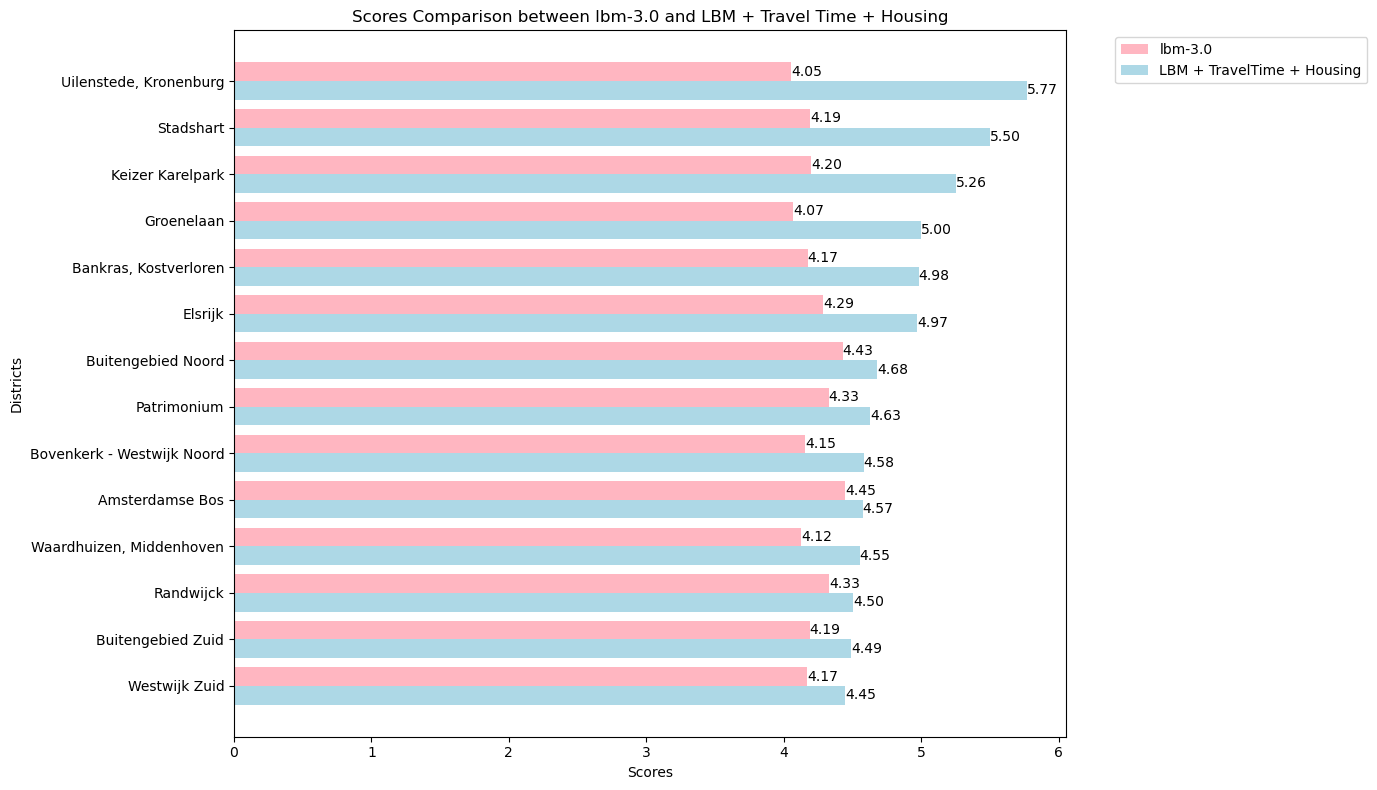

In [13]:

df = df.sort_values(by='lbmTravelRental', ascending=True)


plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4


bar1 = plt.barh(index + bar_width, df['lbm'], color='lightpink', height=bar_width, label='lbm-3.0')
bar2 = plt.barh(index, df['lbmTravelRental'], color='lightblue', height=bar_width, label='LBM + TravelTime + Housing')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm-3.0 and LBM + Travel Time + Housing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()


plt.show()
